# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Homework Assignment 1
# Due date: 4th October 2024
## Save the notebook with your name and submit it by the due date.


Didactic purpose of this assignment:

- Practice your Python coding skills for common data science tasks such as data cleaning, preprocessing and data visualization.

In [14]:
## Some basic libraries have been imported for you here
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

You are given a real world dataset on wine samples collected from a region in Portugal. The dataset contains information on various characteristics measured from the wine samples. 
The dataset contains the following features.

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0(poor) and 10(good))


In [15]:
filepath = 'wine_recordings.csv'
data = pd.read_csv(filepath)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,collection_date
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,2020-12-07
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,2020-09-23
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2017-07-30
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,2016-04-13
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,2018-01-23


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1 (0.2pts)

### 1a: Your first task is identify whether the dataset needs to be cleaned. Justify your answer in a text. Show evidence of how you do this.
### 1b: Next, based on your answers in 1a, implement functions to do this .


</div>

In [16]:
# Task 1a
print("Data cleaning commonly addresses the structure and encoding of the data, checking for missing values,\nconverting units and extrating new features from the existing data if needed. Common issues invole\nzeros replacing missing values in the data, inconsistent spellings, duplicate entries or unspecified units.\nBelow, i will investigate some common issues and discuss how they could be addressed.")
print()

#Checking structure of features
print('There are many columns that do not have specified units, but since there is no metadata to the dataset,\nthis can not be addressed with the given information.\n')

#Checking for inconsistent encoding/datatypes (I could not figure out how to do this effectively with df.info())
datatypes = []
for _, row in data.iterrows():
    types=[type(variable) for variable in row]
    datatypes.append(types)

reference = datatypes[0]
num_inconsistent_datatypes_rows=0
for row in datatypes:
    if row != reference:
        num_inconsistent_datatypes_rows+=1

print(f'We have {num_inconsistent_datatypes_rows} rows with inconsistent variable types. The only datatype that needs to be\nmodified is the collection_date entries from type <string> to <datetime>. Spelling will not be problem for the \nfloating point variables, but there might be inconsistent spellings (or "formats") in the column containing the dates\nsince they are strings, but this will be addressed when converting to datetime. \n')

#Checking for duplicate values
num_duplicate_rows = data.duplicated().sum()
print(f'There are {num_duplicate_rows} duplicate entries in the dataset, so this will neither have to be addressed.\n ')

#Checking for null values
num_null_values_colums = data.isnull().sum()
print(f'There are also some null values in the dataset:\n{num_null_values_colums}\n\nThese entries can either be imputed or deleted.')

num_null_values_rows = len(data[data.isnull().any(axis=1)])
print(f'In this dataset, all null values are located on the same rows since the total number of rows containing a null value is also {num_null_values_rows}\nwhich is the maximum number on null values in any of the columns. The best thing is to delete these rows\nsince the amount of rows with null values is only a small percentage of the total amount of rows, whilst\nat the same time containing a large percentage of null values. Lastly, the null values are not missing at random (NMAR). \nInstead, there is a "systematic missingness" of values.\n')

print('In conclusion, the overall structure of the data seems good, but we can modify the datatype of the entries in the collection_date\ncolumn and then also delete all rows containing null values.')

Data cleaning commonly addresses the structure and encoding of the data, checking for missing values,
converting units and extrating new features from the existing data if needed. Common issues invole
zeros replacing missing values in the data, inconsistent spellings, duplicate entries or unspecified units.
Below, i will investigate some common issues and discuss how they could be addressed.

There are many columns that do not have specified units, but since there is no metadata to the dataset,
this can not be addressed with the given information.

We have 0 rows with inconsistent variable types. The only datatype that needs to be
modified is the collection_date entries from type <string> to <datetime>. Spelling will not be problem for the 
floating point variables, but there might be inconsistent spellings (or "formats") in the column containing the dates
since they are strings, but this will be addressed when converting to datetime. 

There are 0 duplicate entries in the dataset, so 

In [17]:
#Task 1b

# Changing the datatypes in the collection_date column
def convert_to_datetime(string):
    return datetime.strptime(string, "%Y-%m-%d").date()

data_with_datetime = data.assign(collection_date=[convert_to_datetime(val) for val in data['collection_date']])

# Deleting rows with null values
data_cleaned = data_with_datetime.dropna()
data_cleaned.reset_index(inplace=True, drop=True)
data_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,collection_date
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,2020-12-07
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,2020-09-23
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2017-07-30
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,2016-04-13
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,2018-01-23


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2 (0.2pts)
### According to our wine experts, the datataset is missing a few variables hence we will do some feature engineering. 
### 2a: Write a function to insert or create a new column in the dataframe. The new column should add the values in 'residual sugar' and 'citric acid'. The new column should be called 'acidity balance'
### 2b: Calculate the current age of the wine samples using the collection dates. The calculated age should be inserted into a new column named 'barrel age'. Round off the age to 1 decimal place. Additionally, split the collection date into the year, month, and day. Place these in separate columns.
### 2c. Use the  DataFrame.pipe function to run your implemented methods on the dataframe.

</div>

In [18]:
# Task 2a
def create_acidity_balance(df):
    new_df = df.assign(acidity_balance=data_cleaned['residual sugar'] + data_cleaned['citric acid'])
    return new_df

# Task 2b
def create_barrel_age(df):
    today = datetime.today()
    ages_list = []

    for date in df['collection_date']:
        age = relativedelta(today, date)
        ages_list.append(f'years: {age.years}, months: {age.months}, days: {age.days}')

    new_df = df.assign(barrel_age=ages_list)
    return new_df

def split_collection_dates(df):
    years = [date.year for date in df['collection_date']]
    months = [date.month for date in df['collection_date']]
    days = [date.day for date in df['collection_date']]

    new_df = df.assign(collected_year=years)
    new_df = new_df.assign(collected_month=months)
    new_df = new_df.assign(collected_day=days)

    new_df = new_df.drop('collection_date', axis='columns')

    return new_df

# Task 2c
new_dataframe = (data_cleaned
                 .pipe(create_acidity_balance)
                 .pipe(create_barrel_age)
                 .pipe(split_collection_dates)
                 )

new_dataframe.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity_balance,barrel_age,collected_year,collected_month,collected_day
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1.90,"years: 3, months: 9, days: 24",2020,12,7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,2.60,"years: 4, months: 0, days: 8",2020,9,23
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2.34,"years: 7, months: 2, days: 1",2017,7,30
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,2.46,"years: 8, months: 5, days: 18",2016,4,13
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1.90,"years: 6, months: 8, days: 8",2018,1,23


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3 (0.2pts)

    
### 3a: Select a subset of the data that groups the dataset according to the quality of the wine and the month in which it was collected. Group this subset by the average. Hint: Use the the groupby function.
### 3b. Use an appriopriate plot to visualize this subset. 

</div>

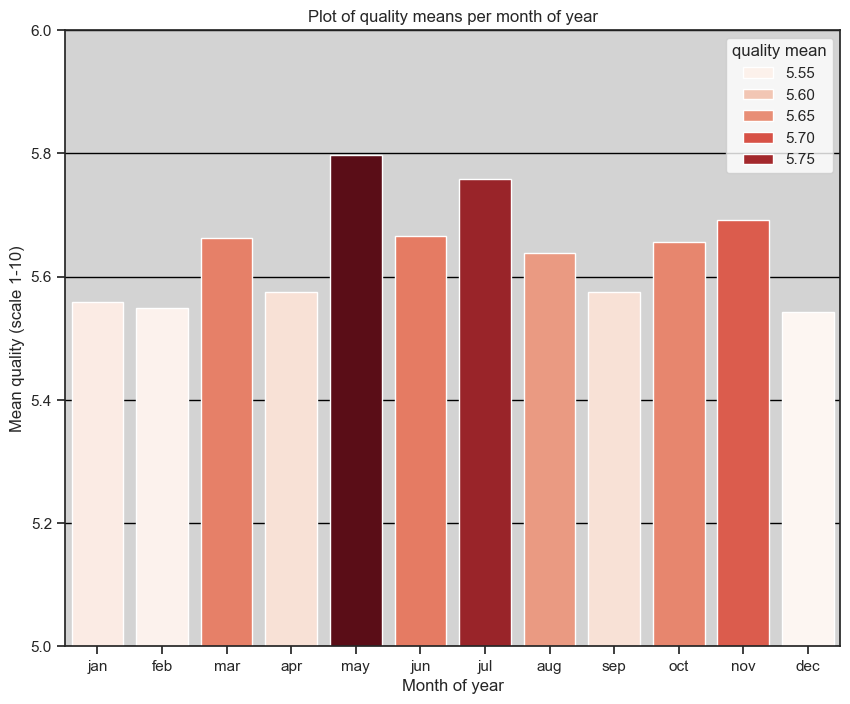

In [19]:
# Task 3a
series = new_dataframe[['quality', 'collected_month']]
quality_means = series.groupby(by='collected_month').mean()['quality']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_quality_means = {'month name':months, 'quality mean':quality_means}
month_quality_means = pd.DataFrame(month_quality_means)

# Task 3b
plt.figure(figsize=(10, 8))

ax = sns.barplot(month_quality_means, x='month name', y='quality mean', hue='quality mean', palette='Reds')

ax.set_facecolor('lightgrey')
ax.yaxis.grid(color='black')
ax.set_ylim(5, 6)
ax.set_ylabel('Mean quality (scale 1-10)')
ax.set_xlabel('Month of year')
ax.set_title('Plot of quality means per month of year')
plt.show()


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4 (0.4pts)
### In this section, you will use visualization methods to derive insights about the wine dataset. 
    
### 4a: In which year were most of the samples collected?
    
### 4b:What is the correlation between the different characteristics collected from the wine samples?

### 4c: What is the distribution of the acidity balance and pH of the wine samples grouped by year?. Were there any differnces between the years?
    
### 4d: A good wine sample is categorized by a quality greater than 6. What is the proportion of good wines to bad wines. 

</div>

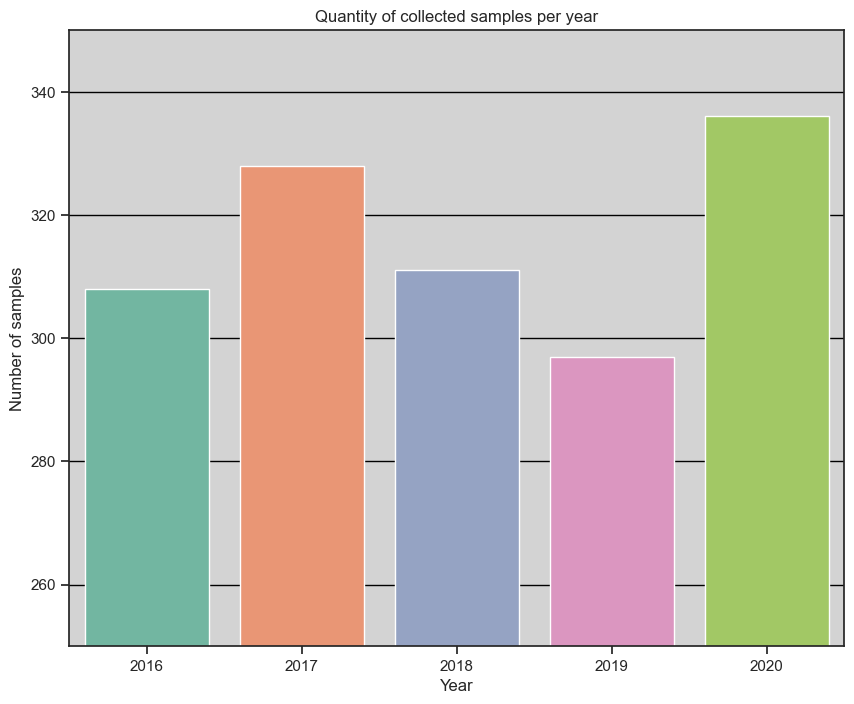

In [20]:
# Task 4a
plt.figure(figsize=(10, 8))
ax = sns.countplot(new_dataframe, x='collected_year', hue='collected_year', palette='Set2', legend=False)
ax.yaxis.grid(color='black')
ax.set_facecolor('lightgrey')
ax.set_ylim(250, 350)
ax.set_ylabel('Number of samples')
ax.set_xlabel('Year')
ax.set_title('Quantity of collected samples per year')
plt.show()

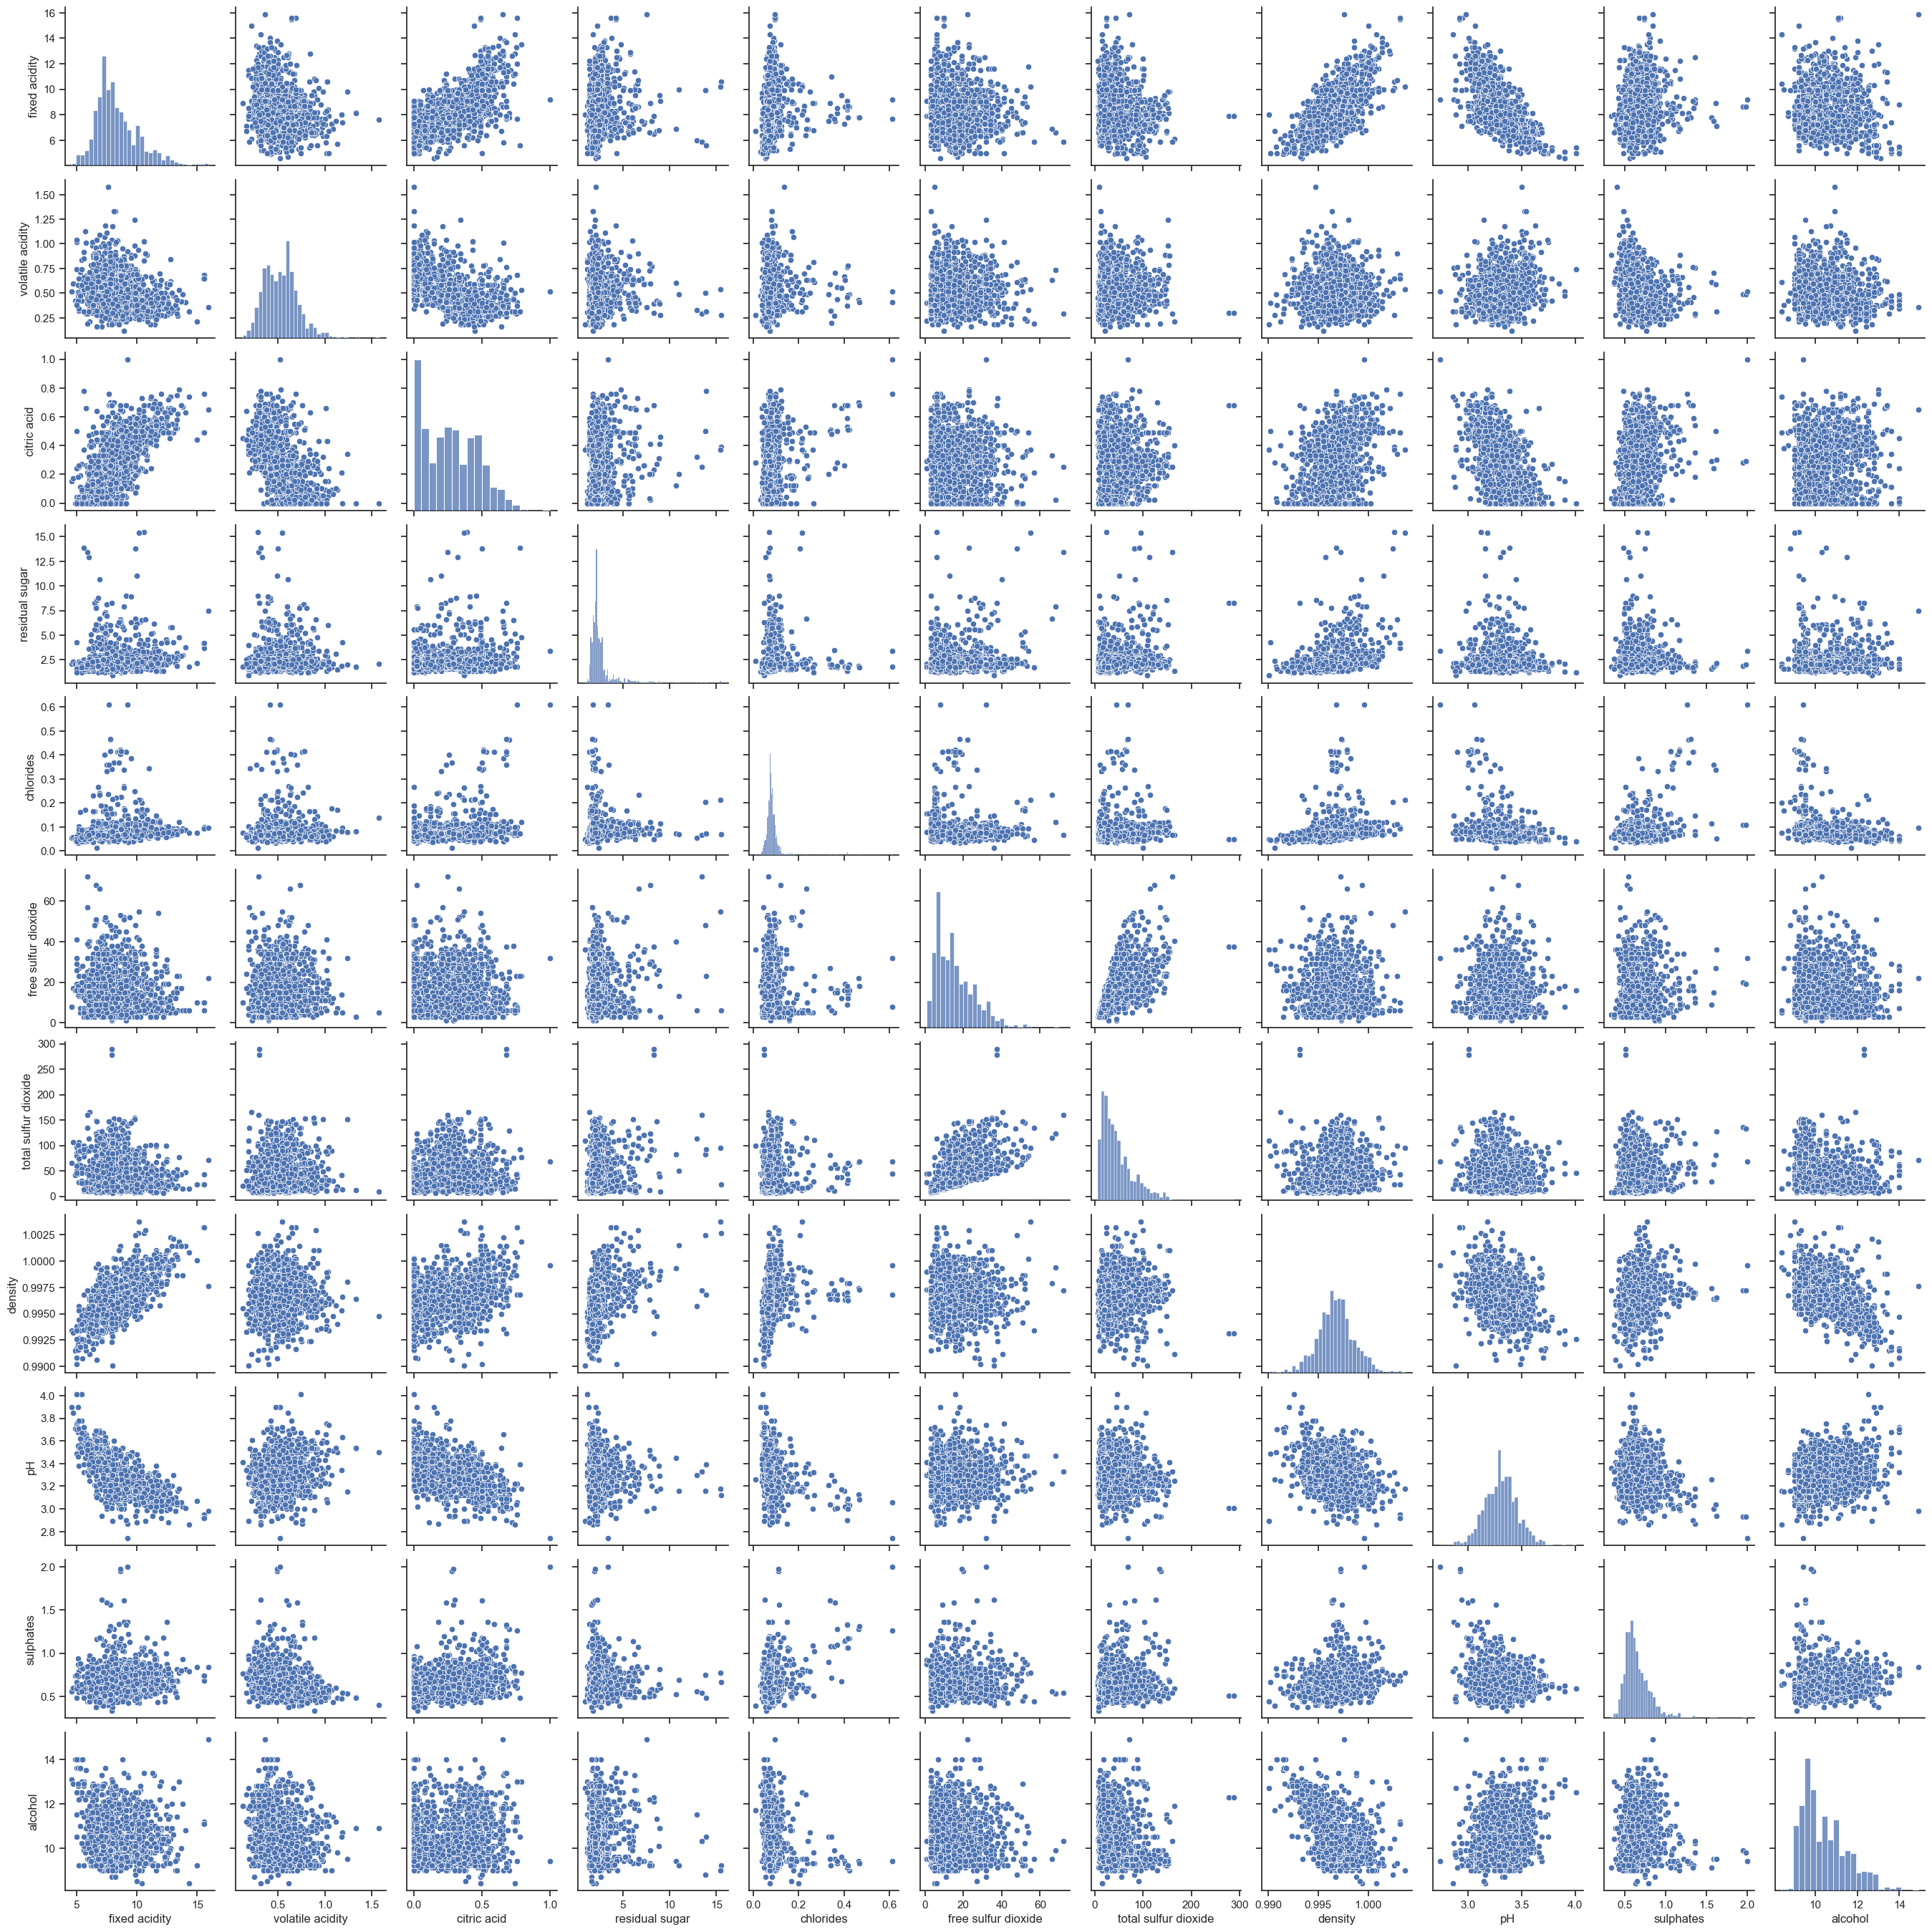

In [21]:
#Task 4b (1/3)

#Im excluding quality and collection date as they are not measurable in the same way as the other characteristics and then making a pairplot to get an oversight of the correlations
series = data[data.columns[:11]]

sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(series)
plt.show()

#Here we can see the distributions of the values on the main diagonal.

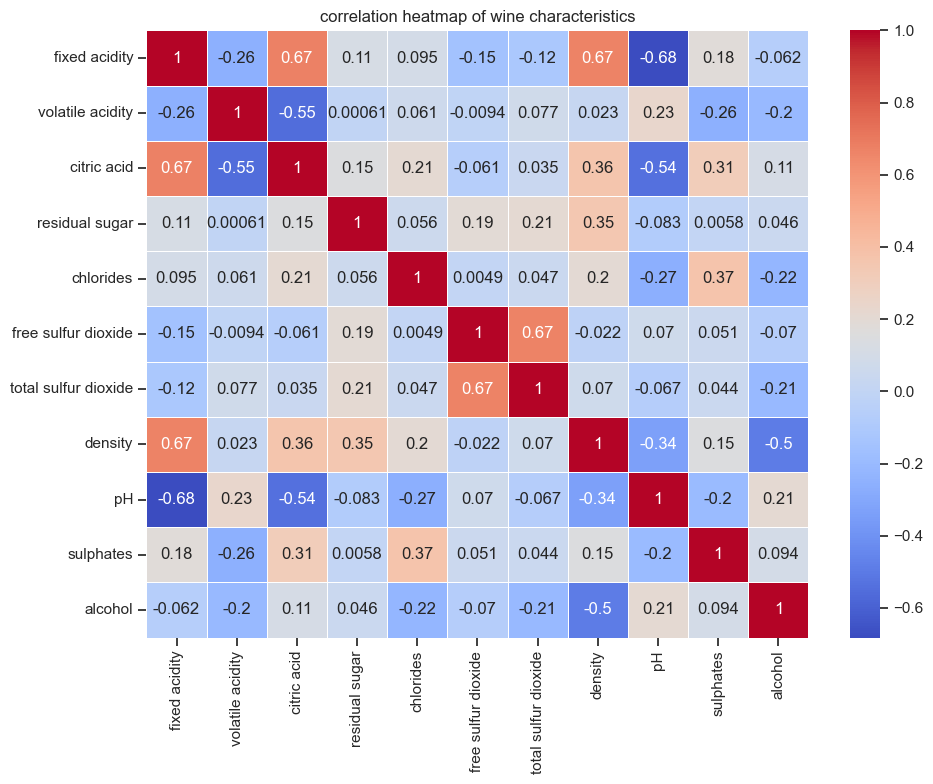

In [22]:
# Task 4b (2/3)
# We can also plot a heatmap of the correlations coeficients

correlation_matrix = series.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation heatmap of wine characteristics')

plt.tight_layout()
plt.show()

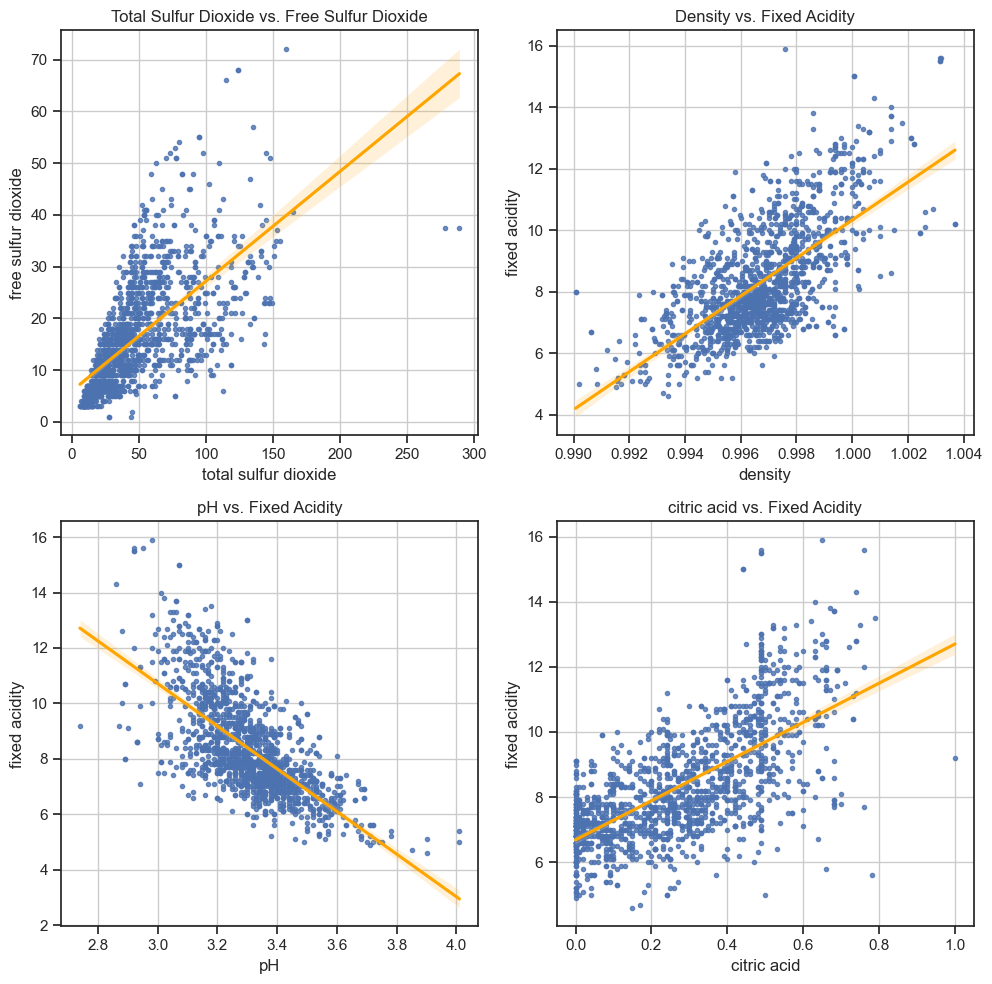

In [23]:
# Task 4b (3/3)

# After looking at the pair plot, i found some interesting linear correaltions which i will plot in more detail

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.regplot(data=data, x='total sulfur dioxide', y='free sulfur dioxide', marker='.', line_kws={'color':'orange'}, ax=axes[0,0])
axes[0,0].set_title('Total Sulfur Dioxide vs. Free Sulfur Dioxide')
axes[0,0].grid()

sns.regplot(data=data, x='density', y='fixed acidity', marker='.', line_kws={'color':'orange'}, ax=axes[0,1])
axes[0,1].set_title('Density vs. Fixed Acidity')
axes[0,1].grid()

sns.regplot(data=data, x='pH', y='fixed acidity', marker='.', line_kws={'color':'orange'}, ax=axes[1,0])
axes[1,0].set_title('pH vs. Fixed Acidity')
axes[1,0].grid()

sns.regplot(data=data, x='citric acid', y='fixed acidity', marker='.', line_kws={'color':'orange'}, ax=axes[1,1])
axes[1,1].set_title('citric acid vs. Fixed Acidity')
axes[1,1].grid()

plt.tight_layout()
plt.show()

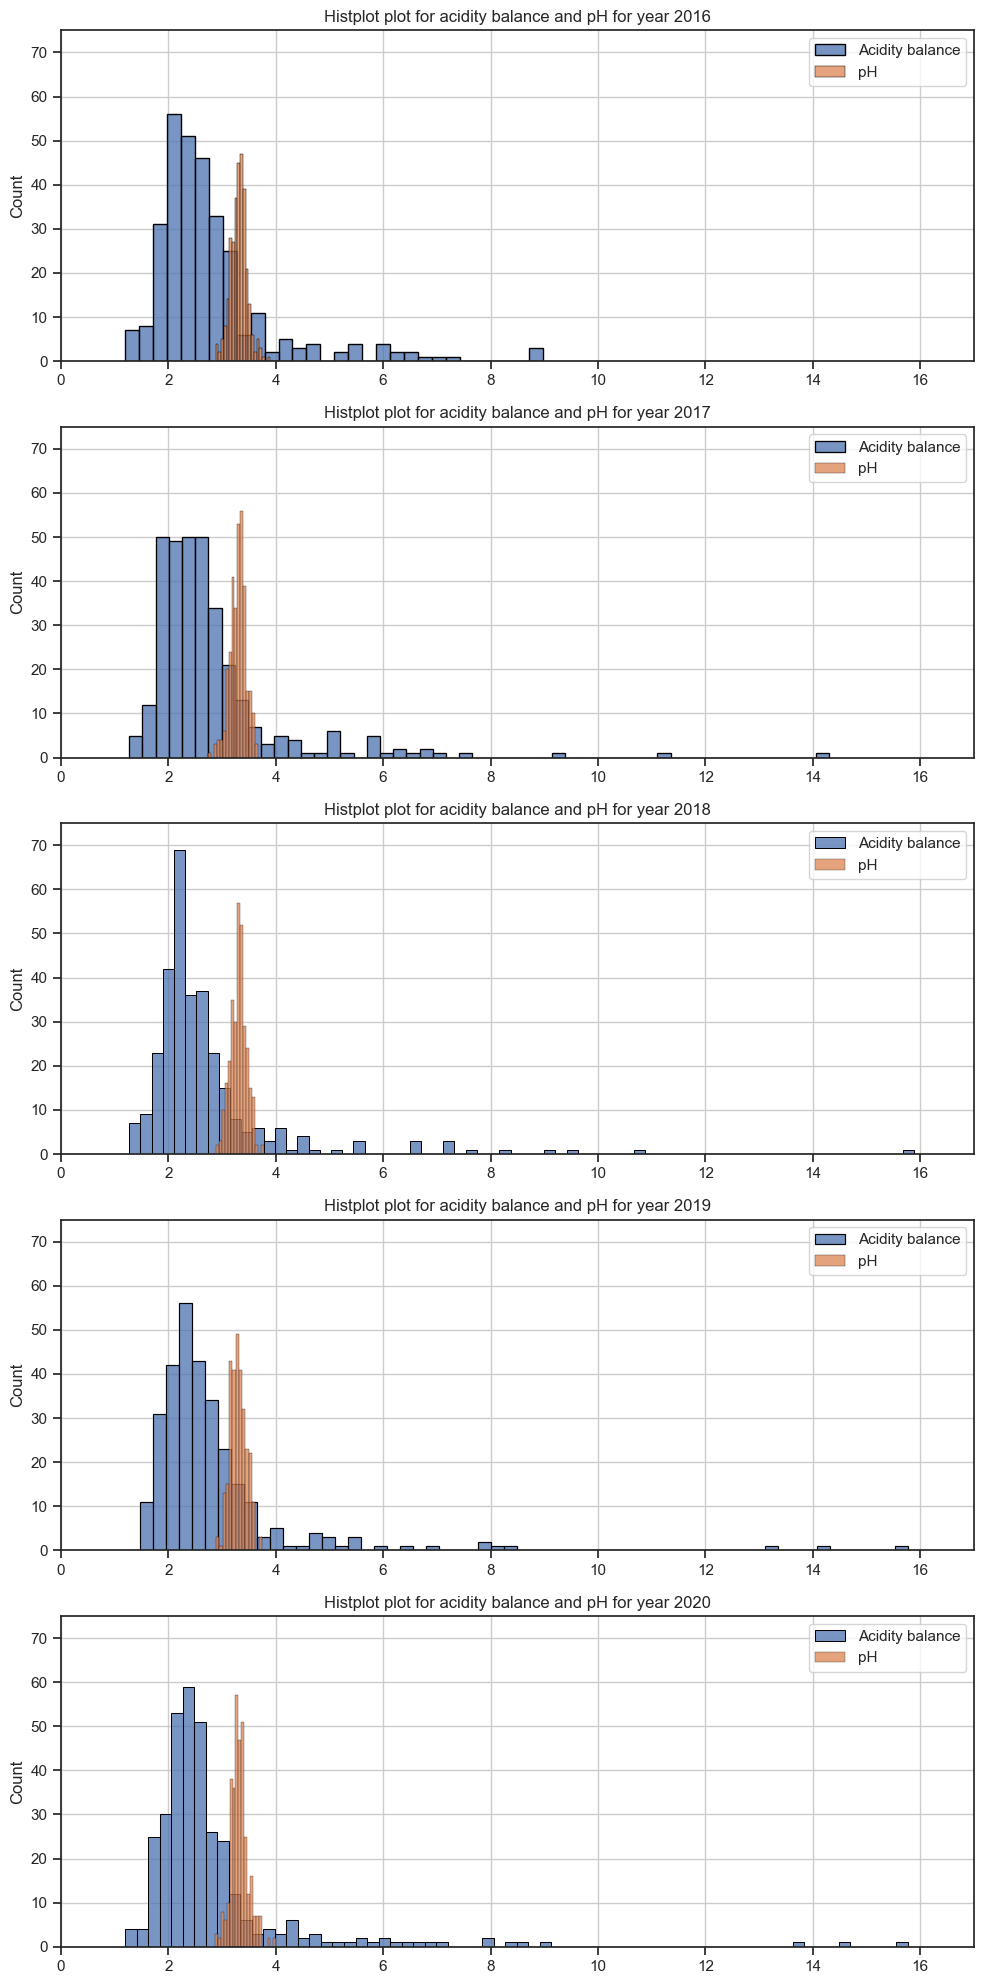

In [24]:
# Task 4c
years = np.sort(new_dataframe['collected_year'].unique())

fig, axes = plt.subplots(5, 1, figsize =(10, 20))

for x in range(len(years)):
    data = new_dataframe.loc[new_dataframe['collected_year']==years[x]]
    sns.histplot(data=data, x='acidity_balance', fill=True, label='Acidity balance', ax= axes[x], edgecolor='black')
    sns.histplot(data=data, x='pH', fill=True, label='pH', ax= axes[x], edgecolor='black')
    axes[x].set_ylim(0, 75)
    axes[x].set_xlim(0, 17)
    axes[x].grid()
    axes[x].legend()
    axes[x].set_xlabel('')
    axes[x].set_title(f'Histplot plot for acidity balance and pH for year {years[x]}')

plt.tight_layout()
plt.show()

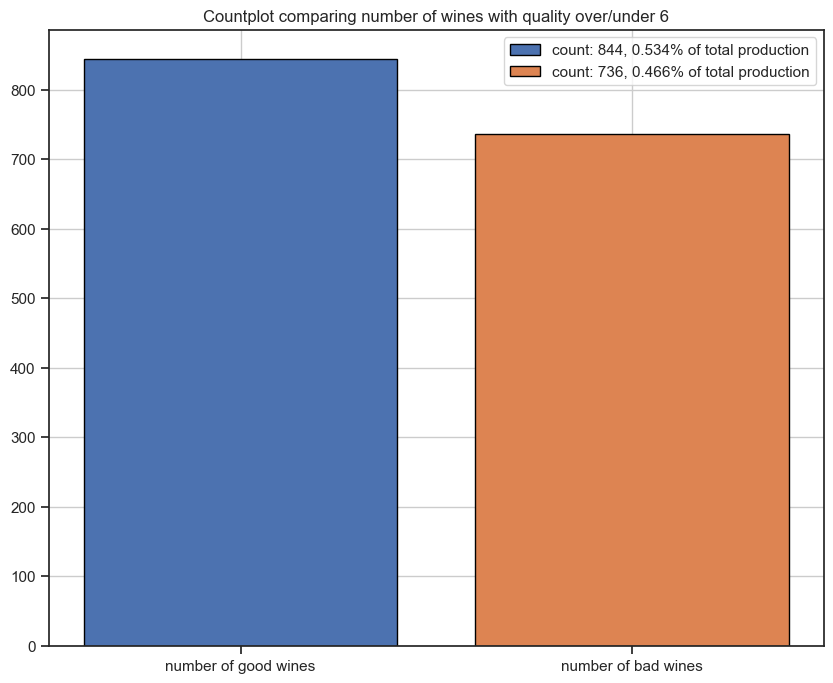

In [25]:
# Task 4d
num_good_wines = len(new_dataframe['quality'].loc[new_dataframe['quality']>=6])
num_bad_wines =  len(new_dataframe['quality'].loc[new_dataframe['quality']<6])
length = len(new_dataframe['quality'])

plt.figure(figsize=(10,8))

plt.bar(x='number of good wines', height=num_good_wines, edgecolor='black', label=f'count: {num_good_wines}, {np.round((num_good_wines/length), 3)}% of total production')
plt.bar(x='number of bad wines', height=num_bad_wines, edgecolor='black', label=f'count: {num_bad_wines}, {np.round((num_bad_wines/length), 3)}% of total production')

plt.title('Countplot comparing number of wines with quality over/under 6')
plt.legend()
plt.grid()
plt.show()